# Tarea 3: Clasificacion II + Clustering

**Autores:** Felipe Bravo, Bárbara Poblete, Hernan Sarmiento, Aymé Arango, Alison Fernandez, Ignacio Meza, Cinthia Mabel Sánchez, Gabriel Ramos

**Fecha:** Mayo 2021

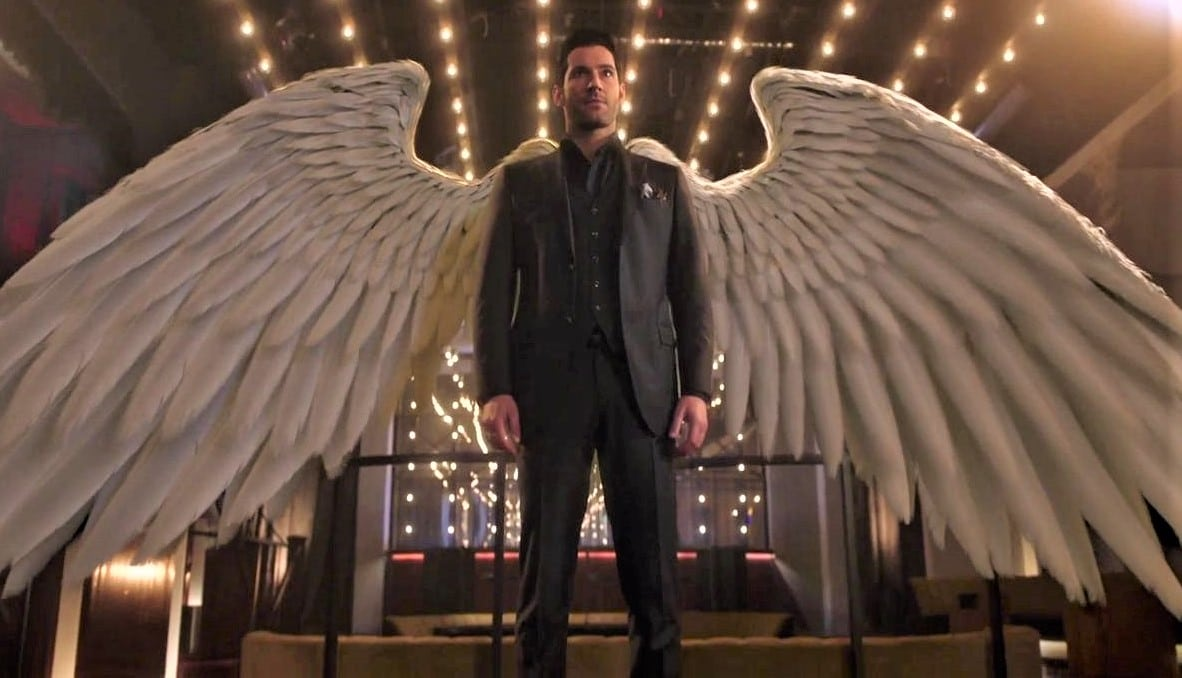

## ============= Declaración de compromiso ético =============

Nosotros ****Javier Lavados y Nicolas García****, declaramos que realizamos de manera grupal los pasos de la presente actividad. También declaramos no incurrir en copia, ni compartir nuestras respuestas con otras personas ni con otros grupos. Por lo que, ratificamos que las respuestas son de nuestra propia confección y reflejan nuestro propio conocimiento.


# Instrucciones


1. Trabajen en equipos de dos o tres personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2. Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda. 

3. Cuando finalice el laboratorio, **genere un archivo HTML** usando jupyter (ver tutorial 2) y súbalo a U-Cursos. El laboratorio debe ser entregado sólo por 1 integrante. Si se entrega por más de un integrante, se revisará cualquiera de éstos.

# Estructura de la tarea

Esta tarea consiste en 3 partes. La primera son preguntas teóricas en las que no necesita escribir código y corresponden a materia vista en clases. La segunda es una sección introductoria para familiarizarse con métodos de clustering. Finalmente la tercera parte es un problema abierto de clasificación donde deberá usar todos los conocimientos que ha adquirido en el curso hasta este momento. Esos conocimientos incluyen exploración de datos, limpieza, entrenamiento de modelos, selección y evaluación.

# Parte 1: Teoría




**1.** Explique para qué se usan variables de holgura en el problema de optimización de la SVM. 

>Respuesta:

El problema de optimización de la SVM es que el margen del límite de desición del hiperplano sea maximal. El problema es que el dataset puede contener outliers, ruido, o un márgen no trivial, por lo que exigir un margen perfecto es totalmente irreal. Para solucionar esto podemos añadir variables de holgura $\xi$ (en la llamada SVM de márgen suave), la cuál relaje las condiciones de optimización y que permita una cantidad de errores razonable. 


**2.** John Doe, un consultor en minería de datos, argumenta lo siguiente: lo malo de las SVMs es que para que encuentren límites de decisión no lineales tengo que proyectarlas manualmente a más dimensiones con una función $\phi(x)$ que tengo que diseñar de manera manual. Esto hace que todo sea mucho más caro computacionalmente pues todas las operaciones las tengo que hacer sobre el espacio transformado. Discuta el argumento de John Doe.

>Respuesta:

Pese a que John Doe tiene razón respecto al costo de calcular una SVM no lineal, esto puede alivianarse usando el llamado *Kernel Trick*. La idea del *Kernel Trick* es calcular el producto punto del espacio trasformado ($\phi (x)ϕ(z)$) inmediatamente y no por separado, con el fin de reducir el costo computacional.



**3.** Usando un clasificador Naive Bayes con Laplace Smoothing entrenado con los datos de la tabla de más abajo, clasifique el siguiente ejemplo a la clase Evade: **[Refund= YES, Marital Status = Divorced]**.

Hint: Tiene que comparar P(Evade=Yes | datos) vs P(Evade=No|datos). Muestre todos sus cálculos.

Refund | Marital Status | Evade
--- | --- | ---
YES | Single | NO
NO | Married | NO
NO | Single | NO
YES | Married | NO
NO | Divorced | YES
NO | Married | NO
YES | Divorced | NO
NO | Single | YES
NO | Married | NO
NO | Single | YES

>Respuesta:

La idea del clasificador Naive Bayes es encontrar la clase C que maximiza $P(C|A_1, A_2, ..., A_n)$. Por lo que clasificar [Refund = YES, Marital Status = Divorced] a la clase *Evade* debe verificar $P(Evade=Yes | Refund=YES, Marital Status=Divorced)$ y $P(Evade=NO | Refund=YES, Marital Status=Divorced)$:
>Usando el Teorema de Bayes:
>$$P(Evade=Yes | Refund=Yes, Marital Status=D) = \frac{P(Refund=Yes, MaritalStatus=Divorced| Evade=Yes) * P(Evade=Yes)}{P(Refund=Yes, MaritalStatus=Divorced)}$$
>
>Asumiendo que son independientes
>
>$$= \frac{P(Refund=Yes| Evade=Yes) * P(MaritalStatus=Divorced| E=Yes) * P(Evade=Yes)}{P(Refund=Yes, MaritalStatus=Divorced)}$$
>
>Luego tenemos que
>
>$$= \frac{P(Refund=Yes| Evade=Yes) * P(MaritalStatus=Divorced| E=Yes) * P(Evade=Yes)}{P(Refund=Yes, MaritalStatus=Divorced | Evade=Yes) * P(Evade=Yes) + P(Refund=Yes, MaritalStatus=Divorced| Evade=No) * P(Evade=No)}$$
>
>Asumiendo que son independencia otra vez
>
>$$= \frac{P(Refund=Yes| Evade=Yes) * P(MaritalStatus=Divorced| Evade=Yes) * P(Evade=Yes)}{P(Refund=Yes| Evade=Yes) * P(MaritalStatus=Divorced| Evade=Yes) * P(Evade=Yes) + P(Refund=Yes| Evade=No) * P(MaritalStatus=Divorced| Evade=No) * P(Evade=No)}$$
>
Luego basta calcular las probabilidades usando la tabla de arriba y reemplazar en la expresion anterior:

$P(Evade=Yes)$ = $\frac{3}{10}$

$P(Evade=No)$ = $\frac{7}{10}$

$P(Refund=Yes|Evade=Yes)$ = $\frac{0}{3} = 0$

$P(Refund=No| Evade=Yes)$ = $\frac{3}{3}$

$P(Refund=Yes| Evade=No)$ = $\frac{3}{7}$

$P(Refund=No| Evade=No)$ = $\frac{4}{7}$

$P(MaritalStatus=Single| Evade=Yes)$ = $\frac{2}{3}$

$P(MaritalStatus=Married| E=Yes)$ = $\frac{0}{3} = 0$

$P(MaritalStatus=Divorced| Evade=Yes)$ = $\frac{1}{3}$

$P(MaritalStatus=Single| Evade=No)$ = $\frac{2}{7}$

$P(MaritalStatus=Married| Evade=No)$ = $\frac{4}{7}$

$P(MaritalStatus=Divorced| Evade=No)$ = $\frac{1}{7}$

Dado que hay probabilidades con valores, usaremos *Laplace Smoothing* con $\alpha = 1$ y calculando las nuevas probabilidades como:
>$$P(A_i = b | C_k) = \frac{Count(A_{ik} = b) + 1}{Count(C_k) + Values(A_i)}$$
>
>Donde se obtienen los siguientes resultados:

$P(Evade=Yes)$ = $\frac{4}{12}$ = $\frac{1}{3}$

$P(Evade=No)$ = $\frac{8}{12}$ = $\frac{2}{3}$

$P(Refund=Yes|Evade=Yes)$ = $\frac{1}{5}$

$P(Refund=No| Evade=Yes)$ = $\frac{4}{5}$

$P(Refund=Yes| Evade=No)$ = $\frac{4}{9}$

$P(Refund=No| Evade=No)$ = $\frac{5}{9}$

$P(MaritalStatus=Single| Evade=Yes)$ = $\frac{3}{6}$ = $\frac{1}{2}$

$P(MaritalStatus=Married| E=Yes)$ = $\frac{1}{6}$

$P(MaritalStatus=Divorced| Evade=Yes)$ = $\frac{2}{6}$ = $\frac{1}{3}$

$P(MaritalStatus=Single| Evade=No)$ = $\frac{3}{10}$

$P(MaritalStatus=Married| Evade=No)$ = $\frac{5}{10}$ = $\frac{1}{2}$

$P(MaritalStatus=Divorced| Evade=No)$ = $\frac{2}{10}$ = $\frac{1}{5}$

Finalmente la probabilidad buscada será:

>$$= \frac{1/5 * 1/3 * 1/3}{1/5 * 1/3 * 1/3 + 4/9 * 1/5 * 2/3}$$ 
>
>$$= \frac{3}{11}$$
>
Y podemos calcular igualmente
$$P(Evade=No | Refund=Yes, MaritalStatus=Divorced) = \frac{P(Refund=Yes, MaritalStatus=Divorced| Evade=No) * P(Evade=No)}{P(Refund=Yes, MaritalStatus=Divorced)} = \frac{8}{11}$$
>
>Sigue que
>$$P(Evade=Yes | Refund=Yes, MaritalStatus=Divorced) = \frac{3}{11}$$
>
>$$P(Evade=No | Refund=Yes, MaritalStatus=Divorced) = \frac{8}{11}$$


**4.** Explique cómo bisecting k-mean soluciona el problema de la inicialización de centroides de k-means.

>Respuesta:

K-Means es muy susceptible a los errores de inicialización de los k centroides, ya que el algoritmo de *K-means* recalcula los centroides a partir de las asignaciones iniciales del mismo. Es por esto que la extensión *Bisecting k-mean* busca primero dividir el conjunto de todos los puntos en dos clusters, para luego elegir uno de los subclusters para ser dividido e iterar hasta producir los k clusters. Lo anterior garantiza una buena inicialización de clusters y reduce enormemente los errores de clasificación de clusters.

**5.** Explique cómo encontrar outliers en los siguientes métodos de clustering:
* K-Means
* Clustering Jerarquico Aglomerativo

>Respuesta:

Dado que *K-Means* es suceptible a outliers, es probable que un valor muy fuera de rango 'corra' el centroide de un cluster visible a un lugar fuera de este. Lo anterior tiene un alto valor de SSE, por lo que basta notar puntos muy alejados de un cluster para identificarlo como un outlier.

Por otro lado, dado que el *Clustering Jerarquico Aglomerativo* une los clusters más cercanos para crear uno único, los outliers podrían dividir un cluster de gran tamaño hacia un outlier. Esto lleva a que la distancia promedio del cluster del outlier sea mayor a lo normal, pudiendo descartarse fácilmente.

**6.** Describa una ventaja y desventaja de los siguientes métodos de clustering:
* K-Means
* Clustering Jerarquico Aglomerativo

>Respuesta:

**K-Means**
Una ventaja de K-Means es que es el método de clustering más sencillo e intuitivo. Pero una desventaja es que este necesita de un k dado que puede que no sea el óptimo dependiendo del dataset.

**Clustering Jerarquico Aglomerativo**
Una ventaja es que puede ser muy robusto a outliers si se usa el cálculo de distancia entre centroides *MAX*, y que puede reconocer grupos no esféricos si se utiliza *MIN*. Pero una desventaja es que si se usa *MAX* dejamos afuera grupos no esféricos, y si se usa *MIN* somos suceptibles a outliers.

**7.** En DBSCAN el parametro `eps` es crucial para obtener buenos clusters. Explique una forma de encontar el valor de `eps`.

>Respuesta:

Para encontrar el valor óptimo de *esp* es necesario ver como se comporta la distancia existente entre cada punto y su k-ésimo vecino más cercano. La distancia existente entre estos se denomina *k-dist*, los cuales al graficar podremos apreciar que la curva en la gráfica aumentará su pendiente de forma drástica. Ese punto de crecimiento exponencial corresponde justamente al valor óptimo de *esp*

**8.** Evaluar clusters no es una tarea fácil. Qué formas de evaluar clusters conoce? Nombre 3 formas de validación y describa cómo podría determinar si los cluters son buenos o malos usando cada una de las formas nombradas.

>Respuesta:

**Matriz de similitud**

Son matrices que permiten visualizar la cercanía de los puntos pertenecientes a un mismo cluster y la lejanía de los puntos de un cluster distinto. Un clustering tiene un buen desempeño si es que en la diagonal de la matriz los valores son cercanos a 0.


**Coeficiente de Silhouette**

Este coeficiente calcula para cada punto un valor de asignación entre -1 y 1, donde 1 significa que el punto está bien asignado, -1 que el punto está mal asignado porque hay otro cluster más similar, y 0 que hay solapamiento de clusters. Así podemos chequear con el valor del coeficiente si algoritmo para el conjunto de datos es bueno o no.


**Validación con expertos**

Consultar con expertos es otra forma de evaluar si los clusters generados por el algoritmo de clustering producen un resultado esperado o no, ya que son capaces de identificar patrones específicos, resultados inesperados, etc.

# Parte 2: Clustering

Para esta parte usaremos el dataset de cantidad de denuncias por 100 mil habitantes por tipo de delito desde el año 2001 al 2016 en Chile (Fuente: http://www.seguridadpublica.gov.cl/estadisticas/tasa-de-denuncias-y-detenciones/delitos-de-mayor-connotacion-social-series-de-datos-2001-2017/).

Ejecute el siguiete código para cargar el dataset:

In [ ]:
import pandas as pd
import numpy as np

dataframe = pd.read_csv("https://users.dcc.uchile.cl/~hsarmien/mineria/datasets/denuncias-2001-2016.txt", sep=" ")
dataframe

,comuna,anio,homicidios,hurtos,robo_lugar,robo_sorpresa,robo_vehiculo,robo_violencia,violacion
1,Arica,2001,1.6,370.3,NaN,9.5,NaN,107.2,16.4
2,Arica,2002,1.1,346.7,NaN,34.0,NaN,122.8,14.9
3,Arica,2003,1.6,460.1,464.4,52.8,172.2,196.2,15.5
4,Arica,2004,1.1,452.2,395.0,64.1,203.7,143.8,13.9
5,Arica,2005,0.0,421.8,287.8,58.4,144.2,144.7,7.5
...,...,...,...,...,...,...,...,...,...
5532,Peñaflor,2012,1.1,375.0,436.5,78.6,59.3,191.5,14.8
5533,Peñaflor,2013,0.0,370.0,408.1,107.6,77.4,213.0,14.6
5534,Peñaflor,2014,1.1,301.3,376.3,112.6,65.1,224.0,5.5
5535,Peñaflor,2015,0.0,321.6,334.7,111.9,73.9,199.9,7.6


Utilizaremos sólo los datos del 2006. Ejecute las siguientes líneas de código para filtrar los datos:

In [ ]:
X = dataframe[dataframe["anio"] == 2006]
X = X.drop(columns=["comuna", "anio"])
X

,homicidios,hurtos,robo_lugar,robo_sorpresa,robo_vehiculo,robo_violencia,violacion
6,1.1,507.5,320.3,60.9,89.0,161.2,8.6
22,0.0,68.0,0.0,0.0,0.0,0.0,0.0
38,0.0,834.9,256.9,0.0,0.0,0.0,64.2
54,0.0,81.2,81.2,0.0,0.0,0.0,0.0
70,0.6,680.3,327.2,211.5,169.7,287.0,18.2
...,...,...,...,...,...,...,...
5462,2.8,359.0,451.3,44.0,27.0,293.8,5.7
5478,3.4,233.4,375.4,27.1,6.8,60.9,6.8
5494,3.4,332.7,492.3,23.8,20.4,71.3,3.4
5510,0.0,263.6,529.3,57.1,22.0,235.0,11.0


## K-Means

**1.** Cuando usamos K-Means debemos definir previamente el número de clusters que queremos generar. Teniendo en cuenta estos datos, implemente un método que nos permita determinar cuántos clusters usar.

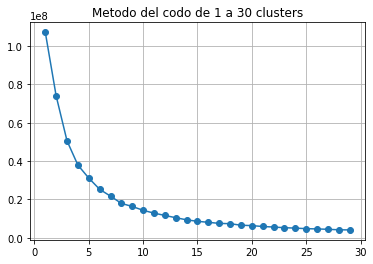

In [ ]:
# Respuesta

from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

# Plotly library
#!pip install plotly --upgrade
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

random_state = 20

sse = []

clusters = list(range(1, 30))
for k in clusters:
    kmeans = KMeans(n_clusters=k).fit(X)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo de 1 a 30 clusters")
plt.grid(True)
plt.show()


**2.** Cuántos clusters propone usar para este dataset? Justifique su elección.

> Respuesta:

**3.** Entrene un modelo de K-Means usando el número de clusters que eligió en la pregunta anterior e imprima las asignaciones de clusters para cada dato.

In [ ]:
# Respuesta
kmeans = KMeans(n_clusters=10, n_init=20, max_iter=300, random_state=random_state)
kmeans.fit(X) # fit retorna a self
y_pred = kmeans.predict(X)
y_pred

array([8, 0, 2, 0, 2, 1, 0, 0, 1, 0, 2, 8, 1, 0, 1, 1, 0, 2, 8, 8, 2, 2,
       1, 8, 8, 0, 0, 0, 0, 2, 1, 0, 0, 8, 8, 8, 0, 1, 0, 8, 0, 0, 0, 0,
       1, 8, 1, 0, 8, 1, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 3, 8, 1, 0, 1, 0,
       1, 3, 3, 4, 4, 1, 1, 1, 2, 8, 8, 8, 1, 1, 8, 1, 2, 8, 8, 8, 8, 2,
       8, 1, 8, 0, 0, 8, 0, 8, 8, 8, 2, 2, 0, 8, 0, 0, 0, 2, 0, 8, 8, 8,
       0, 0, 0, 0, 2, 2, 8, 8, 8, 8, 8, 8, 8, 8, 0, 8, 0, 8, 1, 8, 2, 8,
       8, 8, 0, 0, 2, 2, 2, 8, 2, 0, 2, 8, 0, 7, 1, 0, 8, 8, 1, 8, 1, 0,
       0, 8, 1, 8, 8, 8, 2, 1, 0, 8, 1, 8, 8, 8, 8, 1, 0, 0, 0, 0, 8, 0,
       8, 0, 1, 8, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 8, 8, 0, 8, 0, 0, 0, 0,
       8, 2, 8, 0, 0, 0, 0, 8, 8, 8, 0, 8, 1, 0, 2, 3, 8, 0, 0, 0, 2, 8,
       2, 8, 8, 8, 0, 0, 0, 8, 8, 8, 2, 2, 0, 8, 2, 8, 0, 8, 8, 8, 1, 8,
       8, 1, 8, 0, 8, 8, 0, 8, 8, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 8, 8, 0,
       8, 0, 8, 8, 0, 8, 0, 0, 0, 2, 0, 8, 0, 0, 2, 2, 0, 8, 0, 8, 0, 0,
       0, 0, 0, 8, 8, 0, 8, 0, 5, 7, 0, 6, 6, 7, 6,

**4.** Al ejecutar el código anterior (pregunta 3) varias veces, obtenemos resultados diferentes. Cómo podría evitar los resultados variables de K-means? Presente al menos 2 opciones para lograr esto. Puede implementarlo o describirlo.

> Respuesta: 

**5.** Ejecute el siguiente código que bajará la dimensionalidad de los datos de 7 a 2. Grafique los datos transformados y pinte los gráficos para tener una representación visual de los clusters.

In [ ]:
from sklearn.decomposition import PCA

new_X = PCA(n_components=2, random_state=0).fit_transform(X)

In [ ]:
# Respuesta
fig = px.scatter(x=new_X[:, 0], y=new_X[:, 1])
fig.show()

## Clustering Jerárquico Aglomerativo

**1.** Usando los datos anteriores, ejecute cada uno de los 4 métodos de clustering jerárquico: complete, single, average y ward, y visualice los dendrogramas formados. Adjunte el código necesario. No necesita generar los 4 dendrogramas en el mismo gráfico, pueden ser distintos.

In [ ]:
# Respuesta
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

complete = linkage(new_X, method="complete")
single = linkage(new_X, method="single")
average = linkage(new_X, method="average")
ward = linkage(new_X, method="ward")


In [ ]:
fig_den_Complete = ff.create_dendrogram(X, 
                                        linkagefun=lambda x: linkage(x, 'complete', metric='euclidean')
                                        )
# Si deseamos podemos variar el tamaño de la salida
fig_den_Complete.update_layout(title="Linkage: Complete",
                      width=800, height=500)
fig_den_Complete.show()

In [ ]:
fig_den_simple = ff.create_dendrogram(X, 
                                        linkagefun=lambda x: linkage(x, 'single', metric='euclidean')
                                        )
# Si deseamos podemos variar el tamaño de la salida
fig_den_simple.update_layout(title="Linkage: Single",
                      width=800, height=500)
fig_den_simple.show()

In [ ]:
fig_den_Average = ff.create_dendrogram(X, 
                                       linkagefun=lambda x: linkage(x, 'average', metric='euclidean')
                                       )
# Si deseamos podemos variar el tamaño de la salida
fig_den_Average.update_layout(title="Linkage: Average",
                      width=800, height=500)
fig_den_Average.show()

In [ ]:
fig_den_Ward = ff.create_dendrogram(X,
                                    linkagefun=lambda x: linkage(x, 'ward', metric='euclidean')
                                    )
# Si deseamos podemos variar el tamaño de la salida
fig_den_Ward.update_layout(title="Linkage: Ward",
                      width=800, height=500)
fig_den_Ward.show()

**2.** Fijándose en el método `single`, a qué altura recomendaría cortar el árbol?

> Respuesta: a la de los 1400

**3.** Ahora si miramos el método `ward`, cuántos clusters propone usar? A qué altura se debe cortar el arbol para obtener esa cantidad de clusters?

> Respuesta: 2000

**4.** Implemente el código para asignar clusters a los datos siguiendo lo que usted propuso en la pregunta **2.** y **3.** y liste la asignación de clusters para cada punto del dataset para `single` y `ward`. Cuántos clusters se generan para el método `single` cortando a la altura que propuso en la pregunta **2.**?

In [ ]:
fig_den_single = ff.create_dendrogram(X,
                                    linkagefun=lambda x: linkage(x, 'single', metric='euclidean')
                                    )

fig_den_single.update_layout(title="Linkage: single",
                      width=800, height=500)
fig_den_single.update_layout(shapes=[
    dict(type= 'rect',y0= 1100, y1= 1100, x0=0, x1=5000,line=dict(
        color="red",
        width=3,
        dash="dashdot")
        )])
fig_den_single.show()

# 2 clusters

In [ ]:
fig_den_ward = ff.create_dendrogram(X,
                                    linkagefun=lambda x: linkage(x, 'ward', metric='euclidean')
                                    )

fig_den_Ward.update_layout(title="Linkage: Ward",
                      width=800, height=500)
fig_den_Ward.update_layout(shapes=[
    dict(type= 'rect',y0= 2000, y1= 2000, x0=0, x1=5000,line=dict(
        color="red",
        width=3,
        dash="dashdot")
        )])
fig_den_Ward.show()

#10 cluster

**5.** Cuántos datos quedan asignados a cada cluster? Agregue el código necesario para objener esta información para los métodos `single` y `ward`.

In [ ]:
# Respuesta


**6.** Usando el dataset con dimensiones reducidas generado en la Parte 1, pregunta 5: `new_X`, grafique los datos y pinte los datos con su asignacion de cluster para los métodos `single` y `ward` para tener una representación visual de los clusters.

In [ ]:
# Respuesta


# Parte 3: Problema Abierto

En esta pregunta usted deberá practicar un proceso reducido de minería de datos. Con el conjunto de datos que le daremos a continuación, usted deberá hacer una exploración de datos, aplicar las técnicas correspondientes de pre procesamiento de datos respecto a lo que encuentre y entrenar modelos de clasificación. Finalmente deberá evaluar los modelos que entrenó y justificar la elección de alguno de ellos.

Ejecute el siguiente código para cargar los datos que usaremos en esta parte. Los datos se encuentran en el archivo `movies.csv` adjunto en el zip.

**Estamos interesados en predecir la variable `imdb_score` a partir de los demas datos.** `imdb_score` es un entero y puede considerarlo como un variable categórica.

In [ ]:
# ponga aqui donde tiene el archivo
data_file = "movies.csv"

data = pd.read_csv(data_file)
data

,movie_title,imdb_score,title_year,num_voted_users,num_critic_for_reviews,num_user_for_reviews,color,director_name,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,duration,gross,language,country,content_rating,budget,aspect_ratio
0,Avatar,8,2009.0,886204,723.0,3054.0,Color,James Cameron,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,Wes Studi,855.0,4834,33000,178.0,760505847.0,English,USA,PG-13,237000000.0,1.78
1,Pirates of the Caribbean: At World's End,7,2007.0,471220,302.0,1238.0,Color,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,1000.0,48350,0,169.0,309404152.0,English,USA,PG-13,300000000.0,2.35
2,Spectre,7,2015.0,275868,602.0,994.0,Color,Sam Mendes,0.0,Christoph Waltz,11000.0,Rory Kinnear,393.0,Stephanie Sigman,161.0,11700,85000,148.0,200074175.0,English,UK,PG-13,245000000.0,2.35
3,The Dark Knight Rises,8,2012.0,1144337,813.0,2701.0,Color,Christopher Nolan,22000.0,Tom Hardy,27000.0,Christian Bale,23000.0,Joseph Gordon-Levitt,23000.0,106759,164000,164.0,448130642.0,English,USA,PG-13,250000000.0,2.35
4,Star Wars: Episode VII - The Force Awakens ...,7,NaN,8,NaN,NaN,NaN,Doug Walker,131.0,Doug Walker,131.0,Rob Walker,12.0,NaN,NaN,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,8,2013.0,629,1.0,6.0,Color,Scott Smith,2.0,Eric Mabius,637.0,Daphne Zuniga,470.0,Crystal Lowe,318.0,2283,84,87.0,NaN,English,Canada,NaN,NaN,NaN
5039,The Following,8,NaN,73839,43.0,359.0,Color,NaN,NaN,Natalie Zea,841.0,Valorie Curry,593.0,Sam Underwood,319.0,1753,32000,43.0,NaN,English,USA,TV-14,NaN,16.00
5040,A Plague So Pleasant,6,2013.0,38,13.0,3.0,Color,Benjamin Roberds,0.0,Eva Boehnke,0.0,Maxwell Moody,0.0,David Chandler,0.0,0,16,76.0,NaN,English,USA,NaN,1400.0,NaN
5041,Shanghai Calling,6,2012.0,1255,14.0,9.0,Color,Daniel Hsia,0.0,Alan Ruck,946.0,Daniel Henney,719.0,Eliza Coupe,489.0,2386,660,100.0,10443.0,English,USA,PG-13,NaN,2.35


## Exploración de datos

**1.** Explore el dataset y de una descripción del dataset. Algunos puntos que puede tocar son el número de datos en el dataset, número de features, tipos de cada features y rangos, datos erroneos, etc.
Aplique el preprocesamiento necesario tal que los datos queden usables para los modelos de clasificación.

Nota: Como la parte de exploración puede ser tan compleja y detallada como uno quiera, tendremos una pauta con lo mínimo que uno debería hacer en un dataset. Consideraremos análisis más detallados como un bonus a esta u otras tareas.

Como una guía para encaminar la exploración, puede considerar los siguientes hints.

**Hints generales:**
* Los datos no vienen limpios y tienen varios problemas que usted sabe como solucionar.
* Qué tipos de datos tiene cada columna?
* Cómo se relacionan las features?

**Hints para bonus:** (no todos los hints corresponden a un puro análisis o procesamiento que pueden hacer sobre los datos, 2 hints pueden corresponden a la misma recomendación)
* Hay features (categóricas) que no aportan información, qué análisis le serviría para ver cómo impactan en el score?
* Revise los nombres de actores y directores.
* Algunas features tienen outliers, encuéntrelos y limpie el dataset. Recuerde el boxplot.
* Qué pasa si hay features extremadamente relacionadas entre sí?
* Temporalmente, son todos los datos representativos al escenario actual?
* Considere el siguiente código y vea si le sirve para algún tipo de análisis:
```python
feature = "..."
# esto cuenta las ocurrencias de cada valor en 'feature'
count = data[feature].value_counts()
# esto calcula el score promedio por cada valor del 'feature'
avg_score = data.groupby(feature)["imdb_score"].mean()
# los juntamos en un mismo dataframe
count.to_frame().join(avg_score)
```


### Respuesta (no intente hacerlo todo en la misma celda)

Nombre de columnas


In [ ]:
data.columns


Index(['movie_title', 'imdb_score', 'title_year', 'num_voted_users',
       'num_critic_for_reviews', 'num_user_for_reviews', 'color',
       'director_name', 'director_facebook_likes', 'actor_1_name',
       'actor_1_facebook_likes', 'actor_2_name', 'actor_2_facebook_likes',
       'actor_3_name', 'actor_3_facebook_likes', 'cast_total_facebook_likes',
       'movie_facebook_likes', 'duration', 'gross', 'language', 'country',
       'content_rating', 'budget', 'aspect_ratio'],
      dtype='object')

Dimensiones

In [ ]:
data.shape

(5043, 24)

Tipo de cada columna

In [ ]:
data.dtypes

movie_title                   object
imdb_score                     int64
title_year                   float64
num_voted_users                int64
num_critic_for_reviews       float64
num_user_for_reviews         float64
color                         object
director_name                 object
director_facebook_likes      float64
actor_1_name                  object
actor_1_facebook_likes       float64
actor_2_name                  object
actor_2_facebook_likes       float64
actor_3_name                  object
actor_3_facebook_likes       float64
cast_total_facebook_likes      int64
movie_facebook_likes           int64
duration                     float64
gross                        float64
language                      object
country                       object
content_rating                object
budget                       float64
aspect_ratio                 float64
dtype: object

info

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                5043 non-null   object 
 1   imdb_score                 5043 non-null   int64  
 2   title_year                 4935 non-null   float64
 3   num_voted_users            5043 non-null   int64  
 4   num_critic_for_reviews     4993 non-null   float64
 5   num_user_for_reviews       5022 non-null   float64
 6   color                      5024 non-null   object 
 7   director_name              4939 non-null   object 
 8   director_facebook_likes    4939 non-null   float64
 9   actor_1_name               5036 non-null   object 
 10  actor_1_facebook_likes     5036 non-null   float64
 11  actor_2_name               5030 non-null   object 
 12  actor_2_facebook_likes     5030 non-null   float64
 13  actor_3_name               5020 non-null   objec

descripcion

In [ ]:
data.describe()

,imdb_score,title_year,num_voted_users,num_critic_for_reviews,num_user_for_reviews,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,duration,gross,budget,aspect_ratio
count,5043.000000,4935.000000,5.043000e+03,4993.000000,5022.000000,4939.000000,5036.000000,5030.000000,5020.000000,5043.000000,5043.000000,5028.000000,4.159000e+03,4.551000e+03,4714.000000
mean,6.439421,2002.470517,8.366816e+04,140.194272,272.770808,686.509212,6560.047061,1651.754473,645.009761,9699.063851,7525.964505,107.201074,4.846841e+07,3.975262e+07,2.220403
std,1.167476,12.474599,1.384853e+05,121.601675,377.982886,2813.328607,15020.759120,4042.438863,1665.041728,18163.799124,19320.445110,25.197441,6.845299e+07,2.061149e+08,1.385113
min,2.000000,1916.000000,5.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.620000e+02,2.180000e+02,1.180000
25%,6.000000,1999.000000,8.593500e+03,50.000000,65.000000,7.000000,614.000000,281.000000,133.000000,1411.000000,0.000000,93.000000,5.340988e+06,6.000000e+06,1.850000
50%,7.000000,2005.000000,3.435900e+04,110.000000,156.000000,49.000000,988.000000,595.000000,371.500000,3090.000000,166.000000,103.000000,2.551750e+07,2.000000e+07,2.350000
75%,7.000000,2011.000000,9.630900e+04,195.000000,326.000000,194.500000,11000.000000,918.000000,636.000000,13756.500000,3000.000000,118.000000,6.230944e+07,4.500000e+07,2.350000
max,10.000000,2016.000000,1.689764e+06,813.000000,5060.000000,23000.000000,640000.000000,137000.000000,23000.000000,656730.000000,349000.000000,511.000000,7.605058e+08,1.221550e+10,16.000000


veamos primero si existen valores Null

In [ ]:
data.isna().sum()

movie_title                    0
imdb_score                     0
title_year                   108
num_voted_users                0
num_critic_for_reviews        50
num_user_for_reviews          21
color                         19
director_name                104
director_facebook_likes      104
actor_1_name                   7
actor_1_facebook_likes         7
actor_2_name                  13
actor_2_facebook_likes        13
actor_3_name                  23
actor_3_facebook_likes        23
cast_total_facebook_likes      0
movie_facebook_likes           0
duration                      15
gross                        884
language                      12
country                        5
content_rating               303
budget                       492
aspect_ratio                 329
dtype: int64

Returns the correlation between columns in a data frame


In [ ]:
data.corr() 

,imdb_score,title_year,num_voted_users,num_critic_for_reviews,num_user_for_reviews,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,duration,gross,budget,aspect_ratio
imdb_score,1.000000,-0.205425,0.397148,0.299285,0.288448,0.162613,0.073688,0.079026,0.049522,0.082355,0.239623,0.255143,0.194009,0.030303,0.063405
title_year,-0.205425,1.000000,0.007397,0.275707,-0.003147,-0.063820,0.086873,0.101890,0.096137,0.109971,0.218678,-0.135038,0.030886,0.045726,0.159973
num_voted_users,0.397148,0.007397,1.000000,0.624943,0.798406,0.297057,0.192804,0.270790,0.287239,0.265911,0.537924,0.314765,0.637271,0.079621,-0.014761
num_critic_for_reviews,0.299285,0.275707,0.624943,1.000000,0.609387,0.180674,0.190016,0.282306,0.271646,0.263203,0.683176,0.258486,0.480601,0.119994,-0.049786
num_user_for_reviews,0.288448,-0.003147,0.798406,0.609387,1.000000,0.221890,0.145461,0.219496,0.230189,0.206923,0.400594,0.328403,0.559958,0.084292,-0.024719
director_facebook_likes,0.162613,-0.063820,0.297057,0.180674,0.221890,1.000000,0.090723,0.119601,0.120199,0.119549,0.162048,0.173296,0.144945,0.021090,0.001642
actor_1_facebook_likes,0.073688,0.086873,0.192804,0.190016,0.145461,0.090723,1.000000,0.390487,0.249927,0.951661,0.135348,0.088449,0.154468,0.022639,-0.020049
actor_2_facebook_likes,0.079026,0.101890,0.270790,0.282306,0.219496,0.119601,0.390487,1.000000,0.559662,0.628404,0.243487,0.131673,0.262768,0.044236,-0.007783
actor_3_facebook_likes,0.049522,0.096137,0.287239,0.271646,0.230189,0.120199,0.249927,0.559662,1.000000,0.473920,0.278844,0.123558,0.308026,0.047451,-0.003366
cast_total_facebook_likes,0.082355,0.109971,0.265911,0.263203,0.206923,0.119549,0.951661,0.628404,0.473920,1.000000,0.209786,0.123074,0.247400,0.036557,-0.017885


Returns the highest value in each column

In [ ]:
data.max() 

imdb_score                          7.00
title_year                       2005.00
num_voted_users                 34359.00
num_critic_for_reviews            110.00
num_user_for_reviews              156.00
director_facebook_likes            49.00
actor_1_facebook_likes            988.00
actor_2_facebook_likes            595.00
actor_3_facebook_likes            371.50
cast_total_facebook_likes        3090.00
movie_facebook_likes              166.00
duration                          103.00
gross                        25517500.00
budget                       20000000.00
aspect_ratio                        2.35
dtype: float64

Returns the lowest value in each column


In [ ]:
data.min()

movie_title                  #Horror 
imdb_score                          2
title_year                       1916
num_voted_users                     5
num_critic_for_reviews              1
num_user_for_reviews                1
director_facebook_likes             0
actor_1_facebook_likes              0
actor_2_facebook_likes              0
actor_3_facebook_likes              0
cast_total_facebook_likes           0
movie_facebook_likes                0
duration                            7
gross                             162
budget                            218
aspect_ratio                     1.18
dtype: object

Returns the standard deviation of each column


In [ ]:
data.std() 

imdb_score                   1.167476e+00
title_year                   1.247460e+01
num_voted_users              1.384853e+05
num_critic_for_reviews       1.216017e+02
num_user_for_reviews         3.779829e+02
director_facebook_likes      2.813329e+03
actor_1_facebook_likes       1.502076e+04
actor_2_facebook_likes       4.042439e+03
actor_3_facebook_likes       1.665042e+03
cast_total_facebook_likes    1.816380e+04
movie_facebook_likes         1.932045e+04
duration                     2.519744e+01
gross                        6.845299e+07
budget                       2.061149e+08
aspect_ratio                 1.385113e+00
dtype: float64

Bigotes de gato

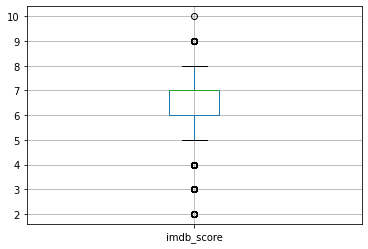

In [ ]:
data.boxplot(column='imdb_score')

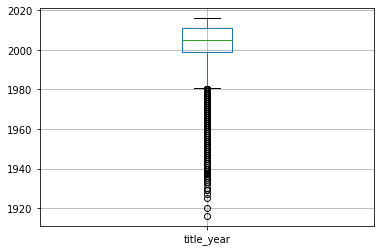

In [ ]:
data.boxplot(column='title_year')

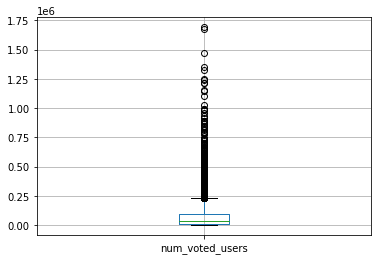

In [ ]:
data.boxplot(column='num_voted_users')

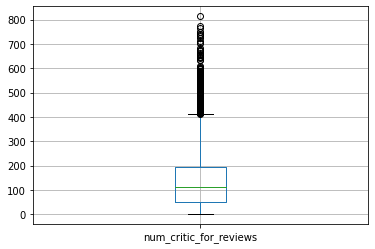

In [ ]:
data.boxplot(column='num_critic_for_reviews')

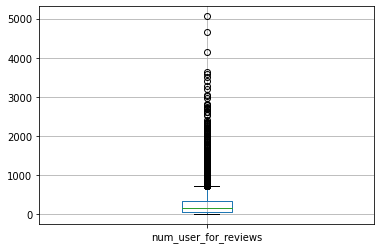

In [ ]:
data.boxplot(column='num_user_for_reviews')

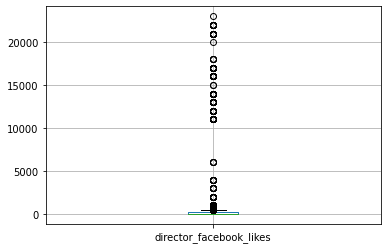

In [ ]:
data.boxplot(column='director_facebook_likes')

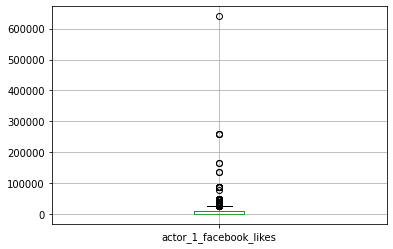

In [ ]:
data.boxplot(column='actor_1_facebook_likes')

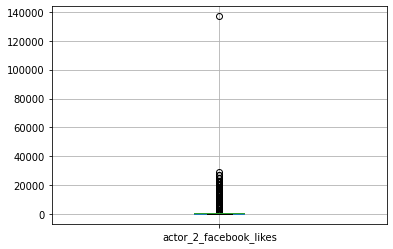

In [ ]:
data.boxplot(column='actor_2_facebook_likes')

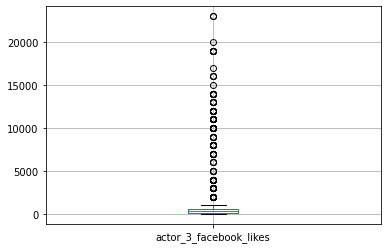

In [ ]:
data.boxplot(column='actor_3_facebook_likes')

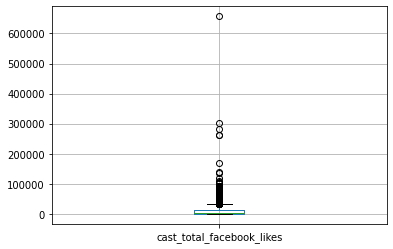

In [ ]:
data.boxplot(column='cast_total_facebook_likes')

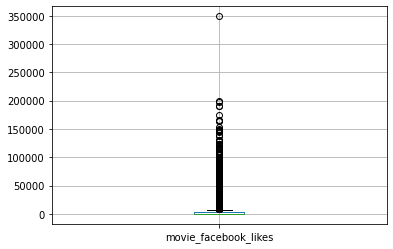

In [ ]:
data.boxplot(column='movie_facebook_likes')

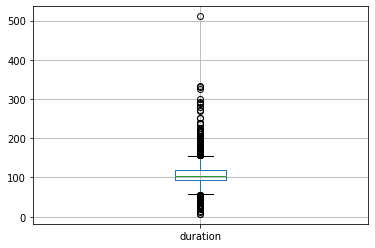

In [ ]:
data.boxplot(column='duration')

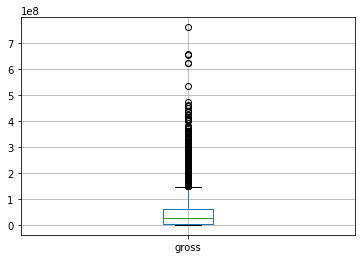

In [ ]:
data.boxplot(column='gross')

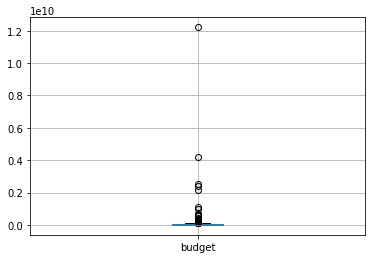

In [ ]:
data.boxplot(column='budget')

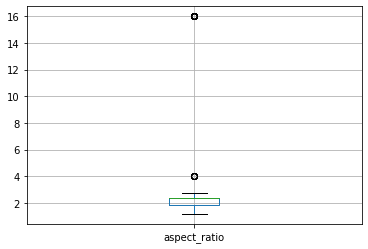

In [ ]:
data.boxplot(column='aspect_ratio')

## Entrenamiento y Evaluación

**2.** Escoja 2 modelos que hayan visto dentro del curso y entrénelos sobre los datos trabajados en la parte anterior. Recuerde aplicar buenas prácticas de entrenamiento vistas en clases y aplicadas en la tarea anterior. Evalúe los modelos en base a métricas vistas en el curso. Puede hacer gráficos o generar tablas para analizar y comparar los modelos.

In [ ]:
# Respuesta


## Conclusiones

**3.** Si este fuera un estudio encargado a usted por alguna empresa o cliente, basándose en los análisis que hizo anteriormente, qué conclusiones reportaría? Qué modelo propondría que fuera implementado en el producto del cliente? Por qué?

>Respuesta: